# 데이터셋 불러오기

In [1]:
# train/test파일 읽기
import pandas as pd

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [2]:
train_df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
0,5b9fc53d-960a-475a-b189-b54d9c7564a6,35,Female,Premium,8.44,47,Asia,Laptop,17.99,Crypto,4,0.18,Sci-Fi,1
1,44c431b4-0f1a-4403-b701-98ab0f23f260,70,Other,Standard,4.75,54,Europe,Mobile,13.99,Gift Card,3,0.09,Romance,1
2,5bdfbdcf-ab7b-41da-b1d5-51f819eb66dc,52,Female,Basic,22.21,54,Oceania,TV,8.99,Credit Card,1,0.40,Romance,1
3,a6439c47-77e6-4c51-b834-0f66b0f1a239,48,Female,Premium,9.65,60,Oceania,Laptop,17.99,Gift Card,4,0.16,Drama,1
4,9ab55bb5-1957-46a6-8472-d26b2fda624a,47,Other,Basic,13.22,8,North America,Mobile,8.99,Crypto,4,1.47,Action,0


In [3]:
test_df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
0,5254de27-f444-44d4-bc79-08efebefaa4b,30,Male,Standard,1.65,58,Europe,Mobile,13.99,Crypto,5,0.03,Horror,1
1,e19f60cc-7e74-458f-9e37-12511d3a3506,67,Female,Premium,0.61,12,Oceania,Tablet,17.99,Crypto,3,0.05,Documentary,1
2,0627fc98-d9f7-49b9-a4cf-fd0b49f4e4d0,31,Male,Basic,11.96,6,Africa,Laptop,8.99,PayPal,4,1.71,Sci-Fi,0
3,a74837e1-dc9c-4feb-a9f4-4091b15d15ea,43,Male,Premium,0.05,33,Europe,Tablet,17.99,Debit Card,4,0.00,Sci-Fi,1
4,25fd1786-ff5a-45fc-bb97-0ab5ba25bbd4,69,Female,Basic,0.64,21,South America,Mobile,8.99,PayPal,1,0.03,Drama,1


In [4]:
train_df.shape, test_df.shape

((3500, 14), (1500, 14))

In [5]:
# SEED 설정
SEED = 42

# 머신러닝 분석에 필요없는 컬럼제거
- customer_id

In [6]:
# 필요없는 컬럼제거: customer_id
train_df = train_df.drop(columns=['customer_id'], axis=1)
# 필요없는 컬럼제거: customer_id
test_df = test_df.drop(columns=['customer_id'], axis=1)
train_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
0,35,Female,Premium,8.44,47,Asia,Laptop,17.99,Crypto,4,0.18,Sci-Fi,1
1,70,Other,Standard,4.75,54,Europe,Mobile,13.99,Gift Card,3,0.09,Romance,1
2,52,Female,Basic,22.21,54,Oceania,TV,8.99,Credit Card,1,0.40,Romance,1
3,48,Female,Premium,9.65,60,Oceania,Laptop,17.99,Gift Card,4,0.16,Drama,1
4,47,Other,Basic,13.22,8,North America,Mobile,8.99,Crypto,4,1.47,Action,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,64,Male,Premium,2.66,57,North America,Desktop,17.99,Credit Card,2,0.05,Romance,1
3496,20,Male,Basic,16.96,53,North America,Tablet,8.99,Gift Card,1,0.31,Action,1
3497,32,Female,Standard,52.67,34,Asia,Laptop,13.99,Gift Card,3,1.50,Sci-Fi,0
3498,67,Other,Standard,10.24,11,South America,Desktop,13.99,Debit Card,2,0.85,Romance,0


In [7]:
train_df.shape, test_df.shape

((3500, 13), (1500, 13))

# 머신러닝을 위한 target과 feature 나누기
- 고객 이탈(churned)을 예측하기 위함
- target: churned, features: 나머지 12개 columns

In [8]:
# target과 나머지 features로 분류
target = train_df['churned']
features = train_df.drop(columns=['churned'], axis=1)
features.shape

(3500, 12)

In [9]:
target.shape

(3500,)

# target의 0과 1개수 파악하기

In [10]:
# target 데이터의 0과 1의 개수 파악
target.value_counts()

churned
1    1761
0    1739
Name: count, dtype: int64

- churned데이터의 개수가 1750개와 큰 차이가 없음
- 별도의 데이터 축소 작업은 하지 않음

# train_test_split 진행
- 앞으로의 random_state는 42로 설정
- 성능에 따라 test_size는 조정가능

In [11]:
# target과 features에 대해서 train_test_split 진행
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=SEED, stratify=target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2800, 12), (700, 12), (2800,), (700,))

In [12]:
# 인덱스 초기화
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_train

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,70,Other,Premium,13.11,59,Africa,Laptop,17.99,Gift Card,2,0.22,Drama
1,45,Male,Premium,8.28,16,South America,Desktop,17.99,Debit Card,5,0.49,Horror
2,21,Female,Premium,27.50,26,South America,Tablet,17.99,Crypto,2,1.02,Horror
3,58,Female,Premium,25.60,55,Asia,Tablet,17.99,PayPal,1,0.46,Action
4,65,Other,Standard,1.83,37,Africa,Desktop,13.99,Credit Card,1,0.05,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,63,Other,Basic,0.85,36,North America,Mobile,8.99,Credit Card,3,0.02,Sci-Fi
2796,26,Other,Premium,9.23,10,North America,Desktop,17.99,Gift Card,3,0.84,Documentary
2797,32,Male,Premium,30.07,24,South America,Mobile,17.99,Debit Card,3,1.20,Documentary
2798,27,Female,Standard,19.23,56,North America,Tablet,13.99,Gift Card,2,0.34,Romance


In [13]:
# test_df에 대한 target, features 나누기
test_df_X = test_df.drop(columns=['churned'], axis=1)
test_df_y = test_df['churned']

In [14]:
test_df_X

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,30,Male,Standard,1.65,58,Europe,Mobile,13.99,Crypto,5,0.03,Horror
1,67,Female,Premium,0.61,12,Oceania,Tablet,17.99,Crypto,3,0.05,Documentary
2,31,Male,Basic,11.96,6,Africa,Laptop,8.99,PayPal,4,1.71,Sci-Fi
3,43,Male,Premium,0.05,33,Europe,Tablet,17.99,Debit Card,4,0.00,Sci-Fi
4,69,Female,Basic,0.64,21,South America,Mobile,8.99,PayPal,1,0.03,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,24,Female,Standard,4.10,21,Europe,Mobile,13.99,Credit Card,5,0.19,Romance
1496,40,Other,Basic,14.01,14,Europe,Laptop,8.99,Debit Card,3,0.93,Romance
1497,68,Male,Basic,24.34,16,Oceania,Desktop,8.99,Credit Card,5,1.43,Documentary
1498,67,Male,Basic,7.17,41,Europe,TV,8.99,Crypto,4,0.17,Comedy


In [15]:
test_df_X.shape, test_df_y.shape

((1500, 12), (1500,))

# train과 test데이터에 대한 결측치 확인

In [16]:
# X_train 정보확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2800 non-null   int64  
 1   gender                  2800 non-null   object 
 2   subscription_type       2800 non-null   object 
 3   watch_hours             2800 non-null   float64
 4   last_login_days         2800 non-null   int64  
 5   region                  2800 non-null   object 
 6   device                  2800 non-null   object 
 7   monthly_fee             2800 non-null   float64
 8   payment_method          2800 non-null   object 
 9   number_of_profiles      2800 non-null   int64  
 10  avg_watch_time_per_day  2800 non-null   float64
 11  favorite_genre          2800 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 262.6+ KB


In [17]:
# X_test 정보확인
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     700 non-null    int64  
 1   gender                  700 non-null    object 
 2   subscription_type       700 non-null    object 
 3   watch_hours             700 non-null    float64
 4   last_login_days         700 non-null    int64  
 5   region                  700 non-null    object 
 6   device                  700 non-null    object 
 7   monthly_fee             700 non-null    float64
 8   payment_method          700 non-null    object 
 9   number_of_profiles      700 non-null    int64  
 10  avg_watch_time_per_day  700 non-null    float64
 11  favorite_genre          700 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 65.8+ KB


In [18]:
# test_df_X 정보확인
test_df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1500 non-null   int64  
 1   gender                  1500 non-null   object 
 2   subscription_type       1500 non-null   object 
 3   watch_hours             1500 non-null   float64
 4   last_login_days         1500 non-null   int64  
 5   region                  1500 non-null   object 
 6   device                  1500 non-null   object 
 7   monthly_fee             1500 non-null   float64
 8   payment_method          1500 non-null   object 
 9   number_of_profiles      1500 non-null   int64  
 10  avg_watch_time_per_day  1500 non-null   float64
 11  favorite_genre          1500 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 140.8+ KB


# train, test 데이터셋 분석 결과
- train, test 모두 결측치(null)없음
- 수치형 데이터: age, watch_hours, last_login_days, monthly_fee, number_of_profiles, avg_watch_time_per_day
- 문자형(카테고리) 데이터: gender, subscription_type, region, device, payment_method, favorite_genre

# 모델 적용을 위한 전처리

## 문자열 데이터: One hot Encoding이용

In [19]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = X_train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])
test_df_X_encoded = encoder.transform(test_df_X[categorical_features])
categorical_features

Index(['gender', 'subscription_type', 'region', 'device', 'payment_method',
       'favorite_genre'],
      dtype='object')

In [20]:
# X_train, X_test, test_df_X에 one hot encoding 적용
train_enc = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
test_enc = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
test_df_enc = pd.DataFrame(test_df_X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
train_enc

,gender_Female,gender_Male,gender_Other,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,region_Africa,region_Asia,region_Europe,region_North America,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2796,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2797,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2798,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
test_enc

,gender_Female,gender_Male,gender_Other,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,region_Africa,region_Asia,region_Europe,region_North America,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
696,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
697,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
test_df_enc

,gender_Female,gender_Male,gender_Other,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,region_Africa,region_Asia,region_Europe,region_North America,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1496,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1497,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1498,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train_enc.shape, test_enc.shape, test_df_enc.shape

((2800, 29), (700, 29), (1500, 29))

# encoding 데이터와 수치형 데이터 병합

In [24]:
# encoding 데이터와 수치형 데이터 병합
train_merge = X_train.select_dtypes(include=['int64', 'float64']).join(train_enc)
test_merge = X_test.select_dtypes(include=['int64', 'float64']).join(test_enc)
test_df_merge = test_df_X.select_dtypes(include=['int64', 'float64']).join(test_df_enc)
train_merge

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,70,13.11,59,17.99,2,0.22,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,45,8.28,16,17.99,5,0.49,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21,27.50,26,17.99,2,1.02,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,58,25.60,55,17.99,1,0.46,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,65,1.83,37,13.99,1,0.05,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,63,0.85,36,8.99,3,0.02,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2796,26,9.23,10,17.99,3,0.84,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2797,32,30.07,24,17.99,3,1.20,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2798,27,19.23,56,13.99,2,0.34,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 수치형데이터: StandardScaler이용

In [25]:
# train_merge, test_merge, test_df_merge에 StandardScaler적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_merge = pd.DataFrame(scaler.fit_transform(train_merge), columns=train_merge.columns)
test_merge = pd.DataFrame(scaler.transform(test_merge), columns=test_merge.columns)
test_df_merge = pd.DataFrame(scaler.transform(test_df_merge), columns=test_df_merge.columns)
train_merge

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,1.721614,0.130759,1.661313,1.163122,-0.717320,-0.231527,-0.720027,-0.705214,1.436474,-0.709760,...,-0.508357,2.004475,-0.509469,-0.397469,-0.416548,-0.409438,2.397288,-0.413592,-0.404669,-0.398673
1,0.095741,-0.279798,-0.783586,1.163122,1.408072,-0.142400,-0.720027,1.418010,-0.696149,-0.709760,...,1.967121,-0.498884,-0.509469,-0.397469,-0.416548,-0.409438,-0.417138,2.417843,-0.404669,-0.398673
2,-1.465098,1.353927,-0.215005,1.163122,-0.717320,0.032553,1.388838,-0.705214,-0.696149,-0.709760,...,-0.508357,-0.498884,-0.509469,-0.397469,-0.416548,-0.409438,-0.417138,2.417843,-0.404669,-0.398673
3,0.941195,1.192425,1.433880,1.163122,-1.425784,-0.152303,1.388838,-0.705214,-0.696149,-0.709760,...,-0.508357,-0.498884,1.962826,2.515918,-0.416548,-0.409438,-0.417138,-0.413592,-0.404669,-0.398673
4,1.396440,-0.828056,0.410434,0.083837,-1.425784,-0.287644,-0.720027,-0.705214,1.436474,-0.709760,...,-0.508357,-0.498884,-0.509469,-0.397469,2.400684,-0.409438,-0.417138,-0.413592,-0.404669,-0.398673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,1.266370,-0.911357,0.353576,-1.265269,-0.008856,-0.297547,-0.720027,-0.705214,1.436474,1.408927,...,-0.508357,-0.498884,-0.509469,-0.397469,-0.416548,-0.409438,-0.417138,-0.413592,-0.404669,2.508319
2796,-1.139923,-0.199046,-1.124735,1.163122,-0.008856,-0.026865,-0.720027,-0.705214,1.436474,-0.709760,...,-0.508357,2.004475,-0.509469,-0.397469,-0.416548,2.442371,-0.417138,-0.413592,-0.404669,-0.398673
2797,-0.749714,1.572381,-0.328721,1.163122,-0.008856,0.091970,-0.720027,1.418010,-0.696149,-0.709760,...,1.967121,-0.498884,-0.509469,-0.397469,-0.416548,2.442371,-0.417138,-0.413592,-0.404669,-0.398673
2798,-1.074888,0.650967,1.490738,0.083837,-0.717320,-0.191915,1.388838,-0.705214,-0.696149,-0.709760,...,-0.508357,2.004475,-0.509469,-0.397469,-0.416548,-0.409438,-0.417138,-0.413592,2.471153,-0.398673


# catboost 적용

In [30]:
# 결측치 확인
train_merge.isnull().sum().sum(), test_merge.isnull().sum().sum(), test_df_merge.isnull().sum().sum()

(np.int64(0), np.int64(0), np.int64(0))

In [27]:
train_merge.shape, test_merge.shape , test_df_merge.shape

((2800, 35), (700, 35), (1500, 35))

In [28]:
from catboost import CatBoostClassifier

In [29]:
model = CatBoostClassifier(verbose=False, random_state=SEED)
model.fit(train_merge, y_train)
print(f'훈련용 평가지표: {model.score(train_merge, y_train)} / 테스트용 평가지표: {model.score(test_merge, y_test)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.9928571428571429


In [31]:
# test.csv에 대한 성능평가
print(f'test.csv 평가지표: {model.score(test_df_merge, test_df_y)}')

test.csv 평가지표: 0.9953333333333333


In [35]:
# train.csv에 대한 roc_curve
from sklearn.metrics import roc_curve, auc

y_pred = model.predict_proba(test_merge)[:,1]
y_predict = model.predict(test_merge)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

score_auc = auc(fpr, tpr)
print(f"로컬PC Score: {score_auc}")

로컬PC Score: 0.9928650731452455


In [36]:
# test.csv에 대한 roc_curve
y_pred = model.predict_proba(test_df_merge)[:,1]
y_predict = model.predict(test_df_merge)
fpr, tpr, thresholds = roc_curve(test_df_y, y_predict)

score_auc = auc(fpr, tpr)
print(f"로컬PC Score: {score_auc}")

로컬PC Score: 0.9953580901856764


In [ ]:
# train.csv에 대한 confusion matrix
from sklearn.metrics import confusion_matrix

pred_tree = model.predict(test_merge)
conf_mx = confusion_matrix(y_test, pred_tree, normalize='true')
conf_mx

array([[0.99425287, 0.00574713],
       [0.00852273, 0.99147727]])

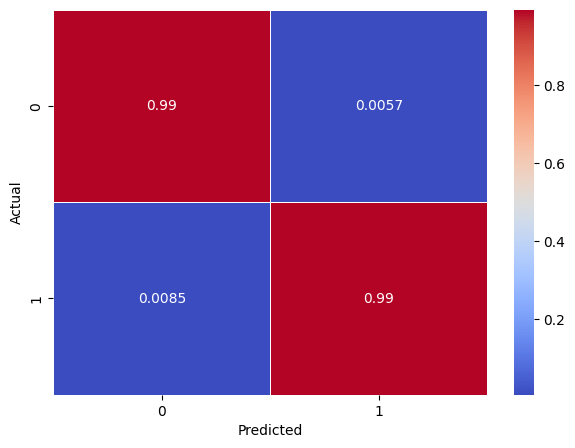

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))

sns.heatmap(conf_mx, annot=True, cmap="coolwarm", linewidth=0.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
# test.csv에 대한 confusion matrix
from sklearn.metrics import confusion_matrix

pred_tree = model.predict(test_df_merge)
conf_mx = confusion_matrix(test_df_y, pred_tree, normalize='true')
conf_mx

array([[1.        , 0.        ],
       [0.00928382, 0.99071618]])

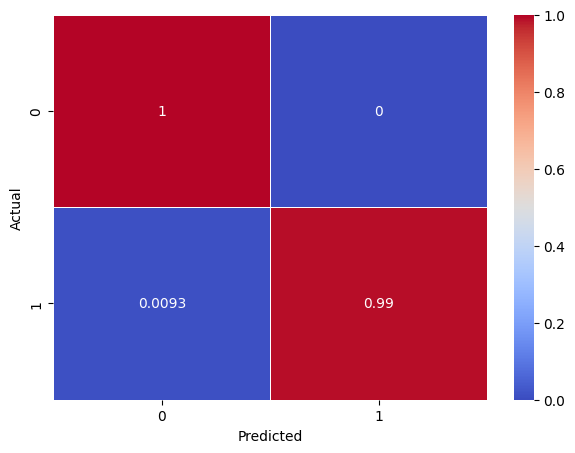

In [40]:
plt.figure(figsize=(7,5))

sns.heatmap(conf_mx, annot=True, cmap="coolwarm", linewidth=0.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()